In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Score'}>]], dtype=object)

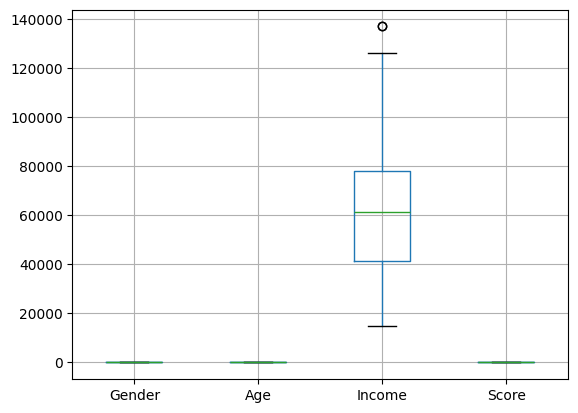

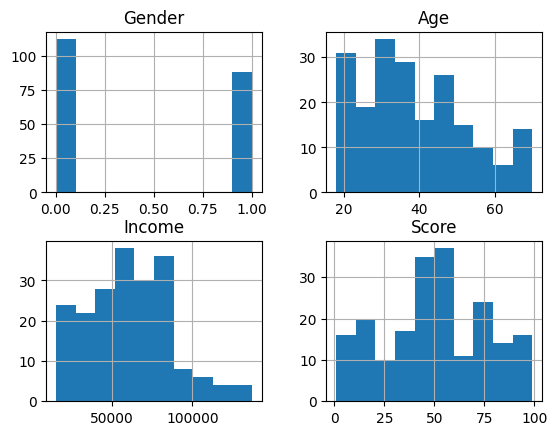

In [3]:
df.boxplot()
df.hist()

In [4]:
scaler = MinMaxScaler()
x = df.values
x = scaler.fit_transform(x)
x

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [5]:
model = DBSCAN(eps=0.18, min_samples=9)
model.fit(x)
labels = model.labels_
labels

array([-1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  2,  1,  1,  0,  1,  1,  1,  1,  1,
        3,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3, -1,  1,  2,  3,  1, -1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2, -1,  2,  1,  1,
        2,  1,  1,  1,  1, -1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1, -1,  2,  2,  2,  2,  1,  1,  3,  1,  1, -1,  1,  1,
        1,  3,  1,  1,  5,  1,  4,  2,  5, -1,  5, -1,  5,  1,  4, -1,  4,
       -1, -1, -1,  4, -1,  5,  1,  4, -1, -1,  2,  4, -1,  5, -1,  5, -1,
        4, -1,  4, -1,  4, -1,  4,  1,  4, -1,  4, -1,  4, -1,  4, -1, -1,
       -1, -1, -1,  5, -1,  4, -1, -1, -1,  5, -1,  4, -1,  4, -1, -1, -1,
       -1, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [6]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

6

In [8]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5}

In [9]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.91395617, 0.36239908, 0.27935409, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.32802768, 0.6805075 , 0.68027682, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [10]:
df["CustomerType"] = labels
df['CustomerType'].value_counts()

CustomerType
-1    81
 1    46
 2    23
 4    19
 0    11
 3    11
 5     9
Name: count, dtype: int64

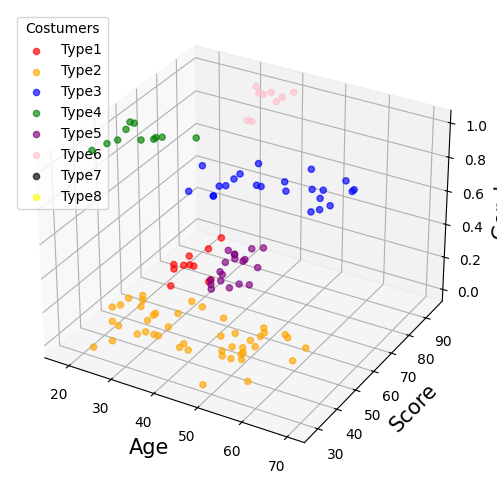

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x1 = df[df["CustomerType"] == 0]["Age"].values
y1 = df[df["CustomerType"] == 0]["Score"].values
z1 = df[df["CustomerType"] == 0]["Gender"].values

x2 = df[df["CustomerType"] == 1]["Age"].values
y2 = df[df["CustomerType"] == 1]["Score"].values
z2 = df[df["CustomerType"] == 1]["Gender"].values

x3 = df[df["CustomerType"] == 2]["Age"].values
y3 = df[df["CustomerType"] == 2]["Score"].values
z3 = df[df["CustomerType"] == 2]["Gender"].values

x4 = df[df["CustomerType"] == 3]["Age"].values
y4 = df[df["CustomerType"] == 3]["Score"].values
z4 = df[df["CustomerType"] == 3]["Gender"].values

x5 = df[df["CustomerType"] == 4]["Age"].values
y5 = df[df["CustomerType"] == 4]["Score"].values
z5 = df[df["CustomerType"] == 4]["Gender"].values

x6 = df[df["CustomerType"] == 5]["Age"].values
y6 = df[df["CustomerType"] == 5]["Score"].values
z6 = df[df["CustomerType"] == 5]["Gender"].values

x7 = df[df["CustomerType"] == 6]["Age"].values
y7 = df[df["CustomerType"] == 6]["Score"].values
z7 = df[df["CustomerType"] == 6]["Gender"].values

x8 = df[df["CustomerType"] == 7]["Age"].values
y8 = df[df["CustomerType"] == 7]["Score"].values
z8 = df[df["CustomerType"] == 7]["Gender"].values

scatter1 = ax.scatter(x1, y1, z1, c="red", alpha=0.65, label="Type1")
scatter2 = ax.scatter(x2, y2, z2, c="orange", alpha=0.65, label="Type2")
scatter3 = ax.scatter(x3, y3, z3, c="blue", alpha=0.65, label="Type3")
scatter4 = ax.scatter(x4, y4, z4, c="green", alpha=0.65, label="Type4")
scatter5 = ax.scatter(x5, y5, z5, c="purple", alpha=0.65, label="Type5")
scatter6 = ax.scatter(x6, y6, z6, c="pink", alpha=0.65, label="Type6")
scatter7 = ax.scatter(x7, y7, z7, c="black", alpha=0.65, label="Type7")
scatter8 = ax.scatter(x8, y8, z8, c="yellow", alpha=0.65, label="Type8")


ax.legend(handles=[scatter1, scatter2, scatter3, scatter4, scatter5, scatter6, scatter7, scatter8], loc="upper left", title="Costumers")

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Score", fontsize=15)
ax.set_zlabel("Gender", fontsize=15)

plt.show()